import the needed libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

download the fashion minist dataset

In [2]:
(x_train, y_train),(x_test, y_test)= datasets.fashion_mnist.load_data()

In [3]:
x_train.shape
y_train.shape

(60000,)

In [4]:
x_test.shape
y_test.shape

(10000,)

In [5]:
y_test.shape

(10000,)

In [6]:
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

define the classess in the dataset

In [7]:
classes=["T-shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

plot a image from the dataset

In [8]:
def plot_sample(x, y, labels):
    plt.figure(figsize=(15,2))
    plt.imshow(x[labels])
    plt.xlabel(classes[y[labels]])

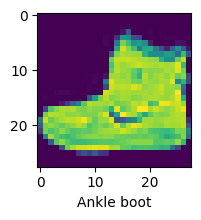

In [9]:
plot_sample(x_train, y_train, 0)

mormalie the data

In [10]:
x_train=x_train/255.0
x_test=x_test/255.0

make an ann model 

In [16]:
ann= models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(300,activation='relu'),
        layers.Dense(200,activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(30,activation='softmax')
])

c:\Users\HP\miniconda3\envs\assignment1\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


compile the model by setting up (optimier, loss function, metrices) 

In [17]:
ann.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train the model on the training data 

In [18]:
ann.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6376 - loss: 1.1599
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8171 - loss: 0.5315
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8399 - loss: 0.4585
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8469 - loss: 0.4300
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8556 - loss: 0.4073
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8606 - loss: 0.3947
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8665 - loss: 0.3719
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8689 - loss: 0.3666
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8729 - loss: 0.3564
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8774 - loss: 0.3413


evluate the model on the test data

In [19]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8717 - loss: 0.3658


[0.3696742057800293, 0.8682000041007996]

see the result of the predicted image 

In [20]:
y_pred= ann.predict(x_test)
np.argmax(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


9

make model2 using conveloution neural networks

In [31]:
cnn= models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

compile the model by setting up (optimier, loss function, metrices) 

In [32]:
cnn.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

train the model on the training data 

In [33]:
cnn.fit(x_train,y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5482 - loss: 1.2659
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7962 - loss: 0.5489
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8311 - loss: 0.4666
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8434 - loss: 0.4285
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8545 - loss: 0.4003
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8649 - loss: 0.3757
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8701 - loss: 0.3555
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8713 - loss: 0.3524
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8764 - loss: 0.3438
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8802 - loss: 0.3266


evluate the model on the test data

In [34]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8797 - loss: 0.3464


[0.3467258810997009, 0.8761000037193298]

see the result of the predicted image

In [35]:
y_pred= cnn.predict(x_test)
np.argmax(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


9

**As we can see from the results of training the models on the same data the accuracy of the cnn model is better and in the evaluating step the cnn is better with 0.008% accuracy so we can conclude that in image processing ussing a cnn will be better and more efficient**